### Load knitr

In [1]:
require("knitr")
opts_knit$set(root.dir = "~/dev/appliedPredictiveModeling")

Loading required package: knitr


### Load ProjectTemplate and project

In [2]:
library( ProjectTemplate )
setwd('..')
load.project()

Project name: appliedPredictiveModeling
Loading project configuration
Autoloading packages
 Loading package: reshape
Loading required package: reshape
 Loading package: plyr
Loading required package: plyr

Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any

 Loading package: dplyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

 Loading package: ggplot2
Loading required package: ggplot2
 Loading package: stringr
Loading required package: stringr
 Loading package: lubridate
Loading required package: lubridate

Attaching package: ‘lubridate’

The follow

### Examine original data

In [3]:
head( segmentationOriginal )

Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,⋯,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
207827637,Test,PS,143.247705,1,185,0,15.71186,3.954802,9.548023,⋯,12.47468,7.609035,2.71410,0,2,2,10.64297,2,42,14
207932307,Train,PS,133.752037,0,819,1,31.92327,205.878517,69.916880,⋯,18.80923,56.715352,118.38814,0,0,0,32.16126,1,215,347
207932463,Train,WS,106.646387,0,431,0,28.03883,115.315534,63.941748,⋯,17.29564,37.671053,49.47052,0,0,0,21.18553,0,371,252
207932470,Train,PS,69.150325,0,298,0,19.45614,101.294737,28.217544,⋯,13.81897,30.005643,24.74954,0,0,2,13.39283,0,487,295
207932455,Test,PS,2.887837,2,285,0,24.27574,111.415441,20.474265,⋯,15.40797,20.504288,45.45046,0,0,0,13.19856,0,283,159
207827656,Test,WS,40.748298,2,172,0,325.93333,652.606061,128.690909,⋯,115.00462,70.918444,184.69291,1,0,0,15.53666,0,191,127


### Examine cleaned data

In [4]:
head(segdata)

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,⋯,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
2,133.75204,0,819,1,31.92327,205.8785,69.91688,164.15345,0,0,⋯,18.80923,56.71535,118.38814,0,0,0,32.16126,1,215,347
3,106.64639,0,431,0,28.03883,115.3155,63.94175,106.69660,0,0,⋯,17.29564,37.67105,49.47052,0,0,0,21.18553,0,371,252
4,69.15032,0,298,0,19.45614,101.2947,28.21754,31.02807,0,0,⋯,13.81897,30.00564,24.74954,0,0,2,13.39283,0,487,295
12,109.41643,0,256,0,18.82857,125.9388,13.60000,46.80000,0,0,⋯,13.92294,18.64303,40.33175,0,0,2,17.54686,0,211,495
15,104.27865,0,258,0,17.57085,124.3684,22.46154,71.20648,0,0,⋯,12.32497,17.74714,41.92853,0,0,2,17.66034,0,172,207
16,77.99194,0,358,0,42.28363,217.1316,42.32164,67.54094,0,0,⋯,20.95648,42.31636,66.96571,0,0,0,19.43055,0,276,385


### Examine skewness of first variable

In [5]:
skewness(segdata$AngleCh1)

[1] -0.02426252

### Apply skewness function over all variables

In [6]:
skew.values <- apply( segdata, 2, skewness )

### Examine skewness vector

In [7]:
head( skew.values )

AngleCh1 AngleStatusCh1        AreaCh1  AreaStatusCh1    AvgIntenCh1 
   -0.02426252     0.93983921     3.52510745     3.06029973     2.95918524 
   AvgIntenCh2 
    0.84816033

### Complete Box-Cox transformation of all variables

In [8]:
Ch1AreaTrans <- BoxCoxTrans( segdata$AreaCh1 )
Ch1AreaTrans

Box-Cox Transformation

1009 data points used to estimate Lambda

Input data summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   194.0   256.0   325.1   376.0  2186.0 

Largest/Smallest: 14.6 
Sample Skewness: 3.53 

Estimated Lambda: -0.9 


### Experiment with preprocess function from caret

In [9]:
# preProcess( segdata
#             , method = c( 'BoxCox'
#                          , 'center'
#                          , 'scale'
#                          , 'pca' ))

Warning message in preProcess.default(segdata, method = c("BoxCox", "center", "scale", :
“These variables have zero variances: MemberAvgAvgIntenStatusCh2, MemberAvgTotalIntenStatusCh2”

ERROR: Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE): cannot rescale a constant/zero column to unit variance


### Examine subset again

In [10]:
head( segdata )

,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,AvgIntenStatusCh2,⋯,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
2,133.75204,0,819,1,31.92327,205.8785,69.91688,164.15345,0,0,⋯,18.80923,56.71535,118.38814,0,0,0,32.16126,1,215,347
3,106.64639,0,431,0,28.03883,115.3155,63.94175,106.69660,0,0,⋯,17.29564,37.67105,49.47052,0,0,0,21.18553,0,371,252
4,69.15032,0,298,0,19.45614,101.2947,28.21754,31.02807,0,0,⋯,13.81897,30.00564,24.74954,0,0,2,13.39283,0,487,295
12,109.41643,0,256,0,18.82857,125.9388,13.60000,46.80000,0,0,⋯,13.92294,18.64303,40.33175,0,0,2,17.54686,0,211,495
15,104.27865,0,258,0,17.57085,124.3684,22.46154,71.20648,0,0,⋯,12.32497,17.74714,41.92853,0,0,2,17.66034,0,172,207
16,77.99194,0,358,0,42.28363,217.1316,42.32164,67.54094,0,0,⋯,20.95648,42.31636,66.96571,0,0,0,19.43055,0,276,385


### Load mlbench package and Glass data

In [11]:
library(mlbench)
data( Glass )
str( Glass )

'data.frame':	214 obs. of  10 variables:
 $ RI  : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na  : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Mg  : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Al  : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Si  : num  71.8 72.7 73 72.6 73.1 ...
 $ K   : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Ca  : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Ba  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe  : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type: Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


### Exersise 3.1

#### a) Using viz, explore the predictor variables to understand their distributions as well as the relationships between predictors.

### Examine Glass data

In [19]:
head( Glass )

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


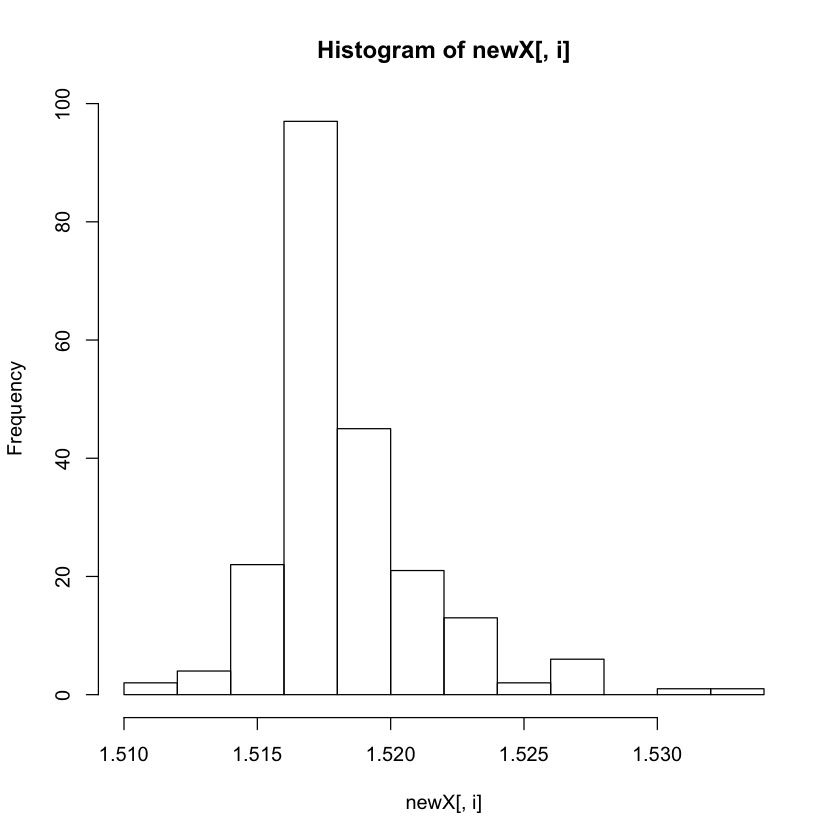

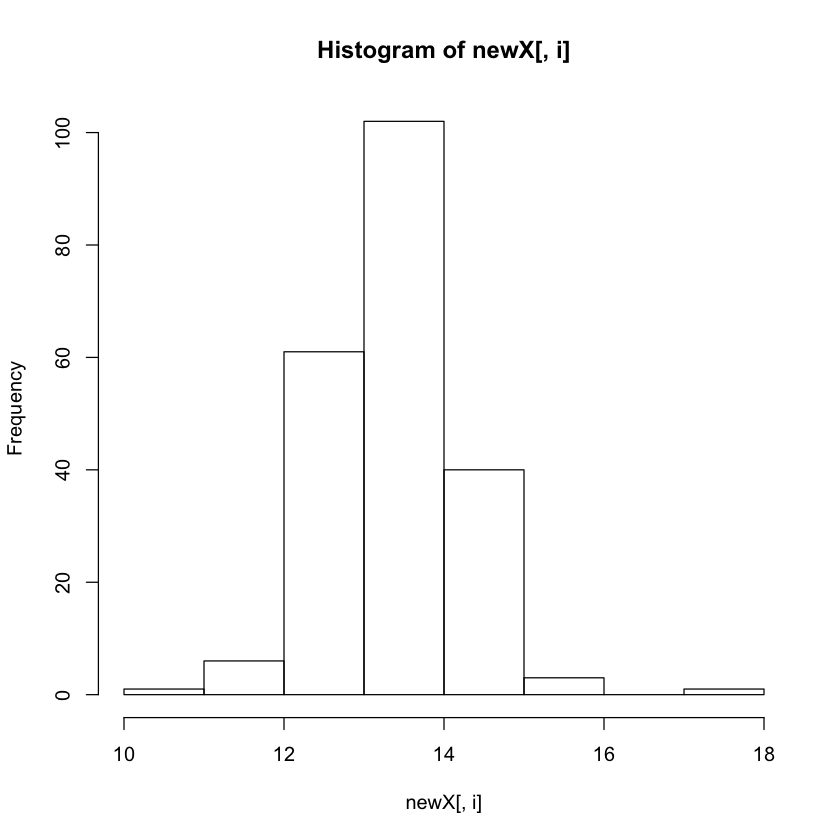

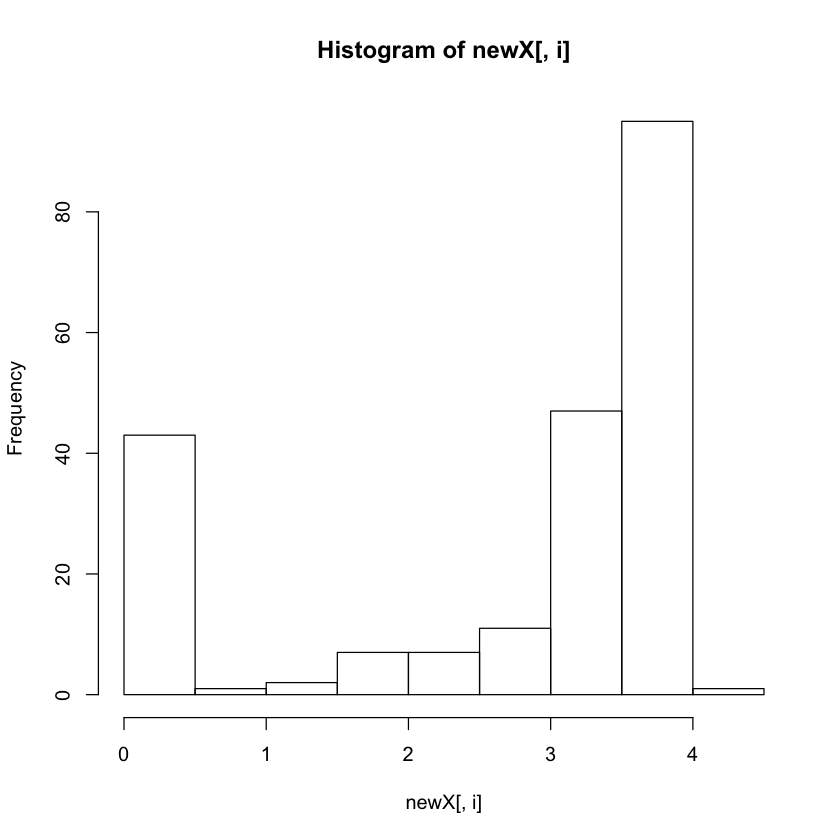

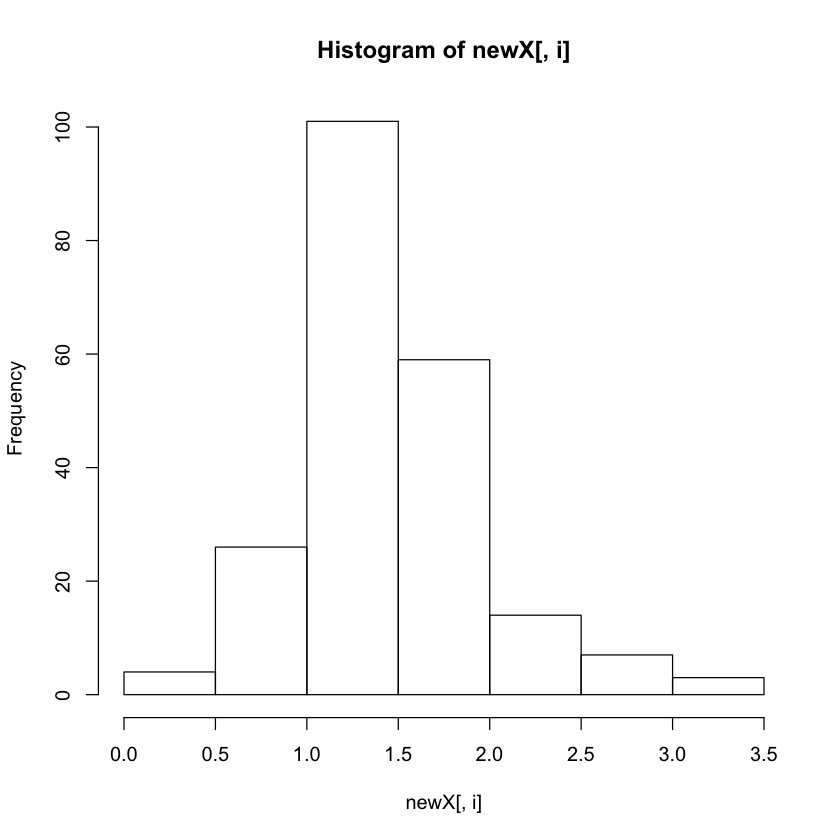

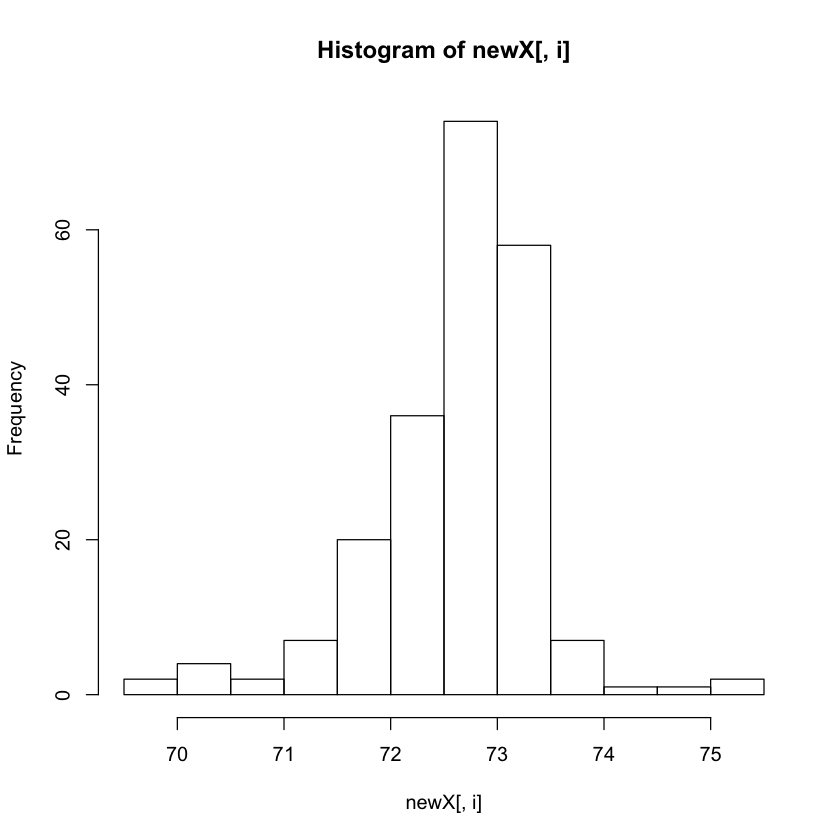

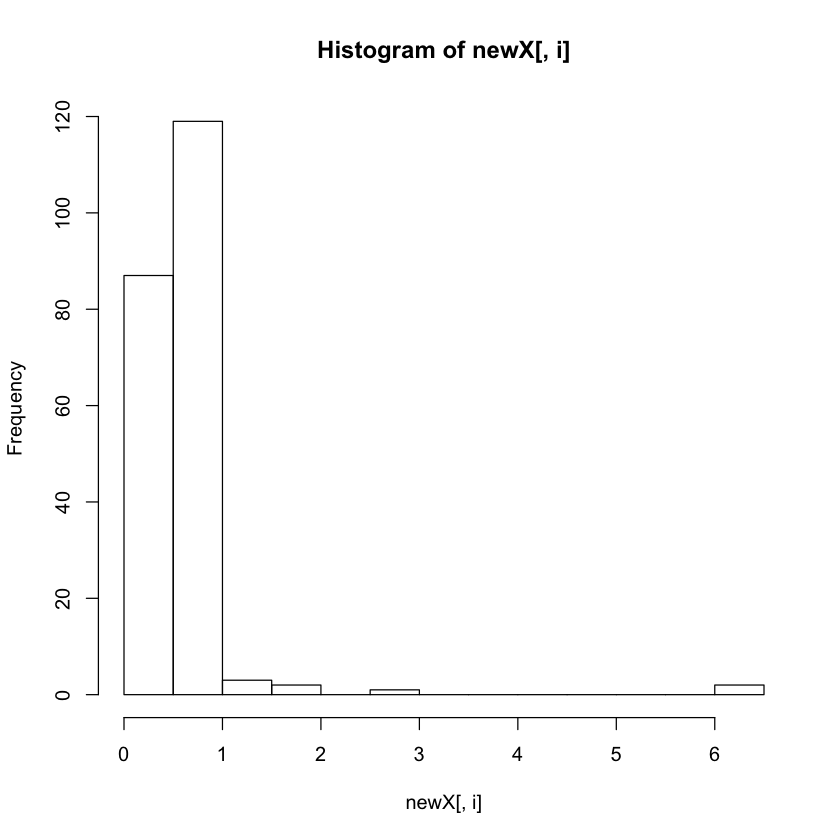

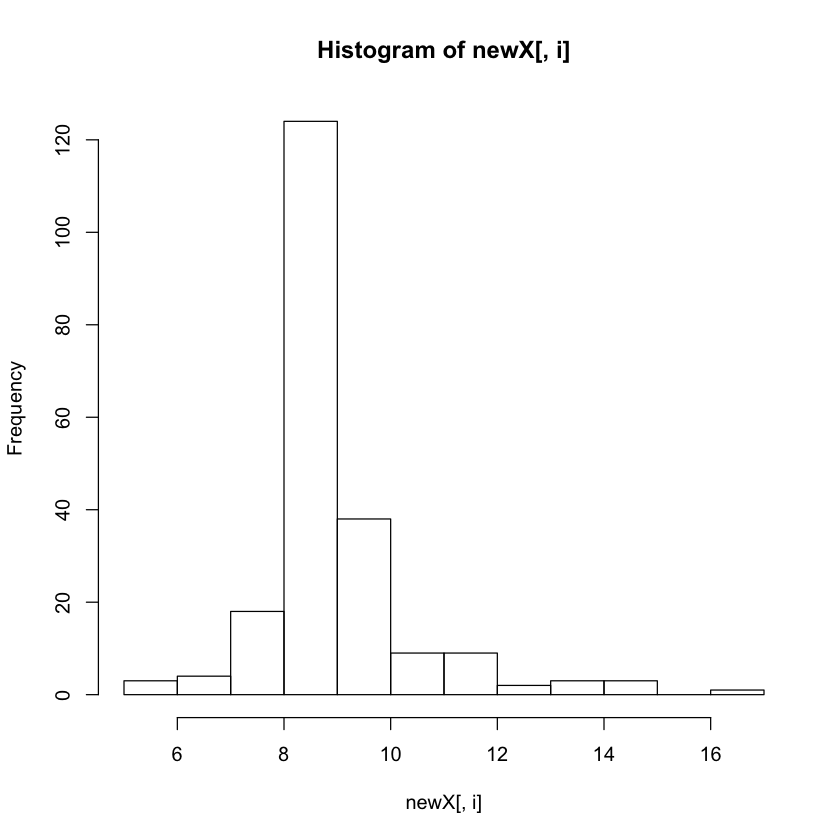

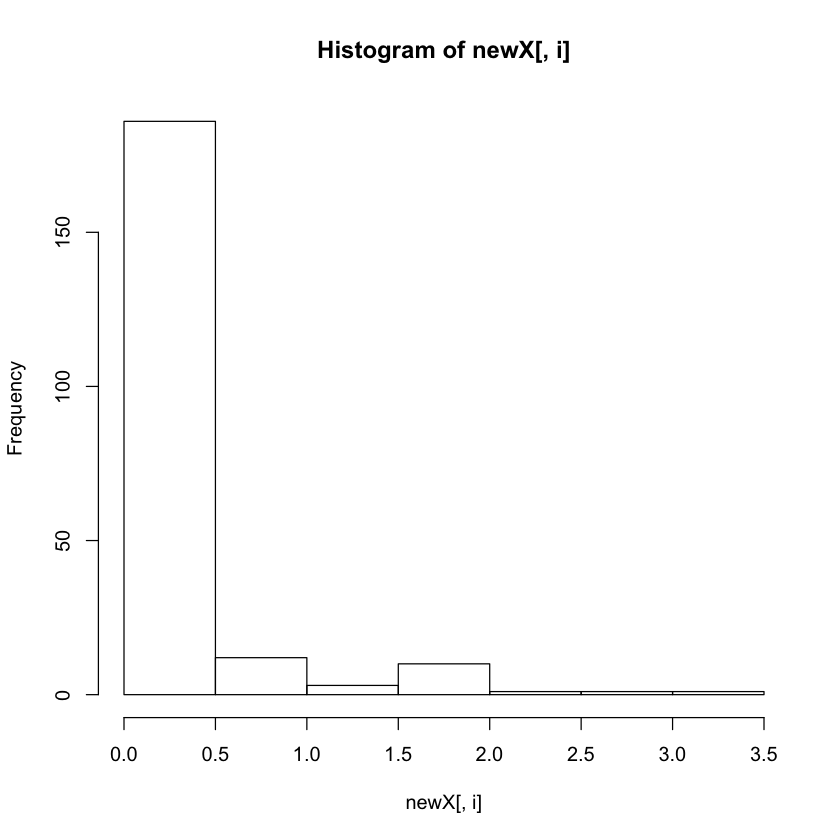

$RI
$breaks
 [1] 1.510 1.512 1.514 1.516 1.518 1.520 1.522 1.524 1.526 1.528 1.530 1.532
[13] 1.534

$counts
 [1]  2  4 22 97 45 21 13  2  6  0  1  1

$density
 [1]   4.672897   9.345794  51.401869 226.635514 105.140187  49.065421
 [7]  30.373832   4.672897  14.018692   0.000000   2.336449   2.336449

$mids
 [1] 1.511 1.513 1.515 1.517 1.519 1.521 1.523 1.525 1.527 1.529 1.531 1.533

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$Na
$breaks
[1] 10 11 12 13 14 15 16 17 18

$counts
[1]   1   6  61 102  40   3   0   1

$density
[1] 0.004672897 0.028037383 0.285046729 0.476635514 0.186915888 0.014018692
[7] 0.000000000 0.004672897

$mids
[1] 10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5

$xname
[1] "newX[, i]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$Mg
$breaks
 [1] 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5

$counts
[1] 43  1  2  7  7 11 47 95  1

$density
[1] 0.401869159 0.009345794 0.018691589 0.065420561 0.065420561 0.102803738
[7] 0.439252336 0.887850

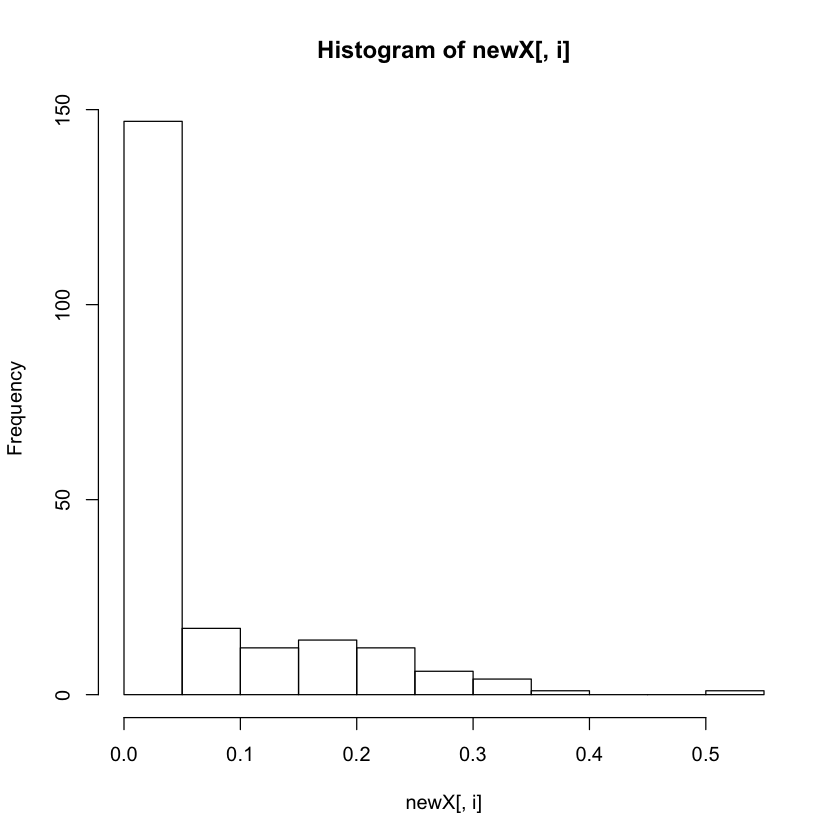

In [12]:
apply( Glass[,1:9], 2, hist)

### Load PerformanceAnalytics package

In [13]:
library( PerformanceAnalytics )

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following objects are masked from ‘package:e1071’:

    kurtosis, skewness

The following object is masked from ‘package:graphics’:

    legend



### Correlation chart

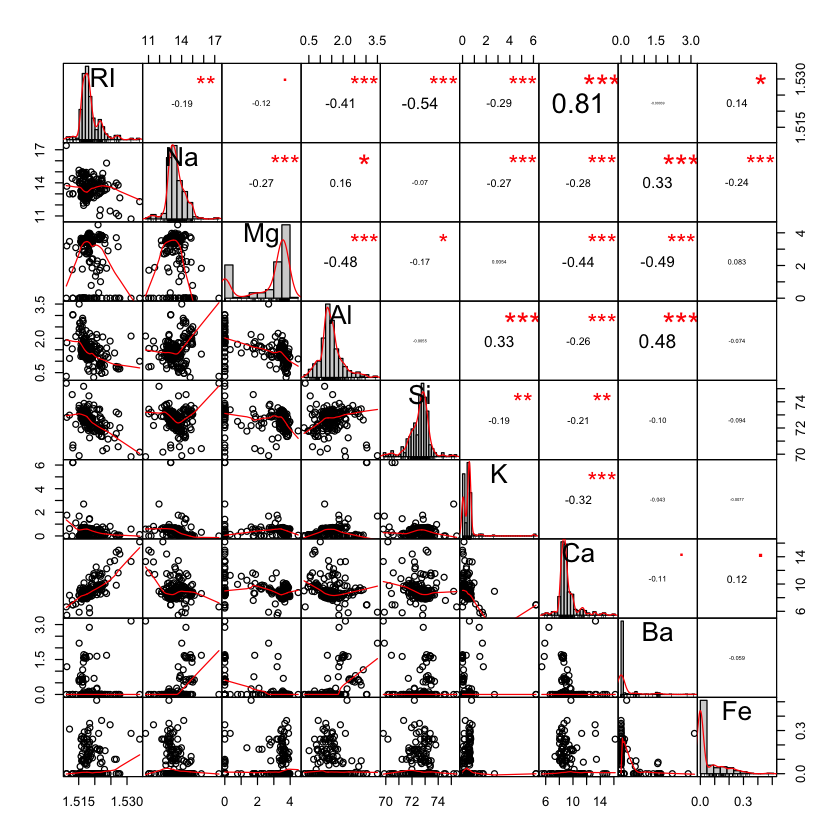

In [18]:
chart.Correlation( Glass[,1:9] )

#### b) Do there appear to be any outliers in the data? Are an predictors skewed?

### Check for outliers

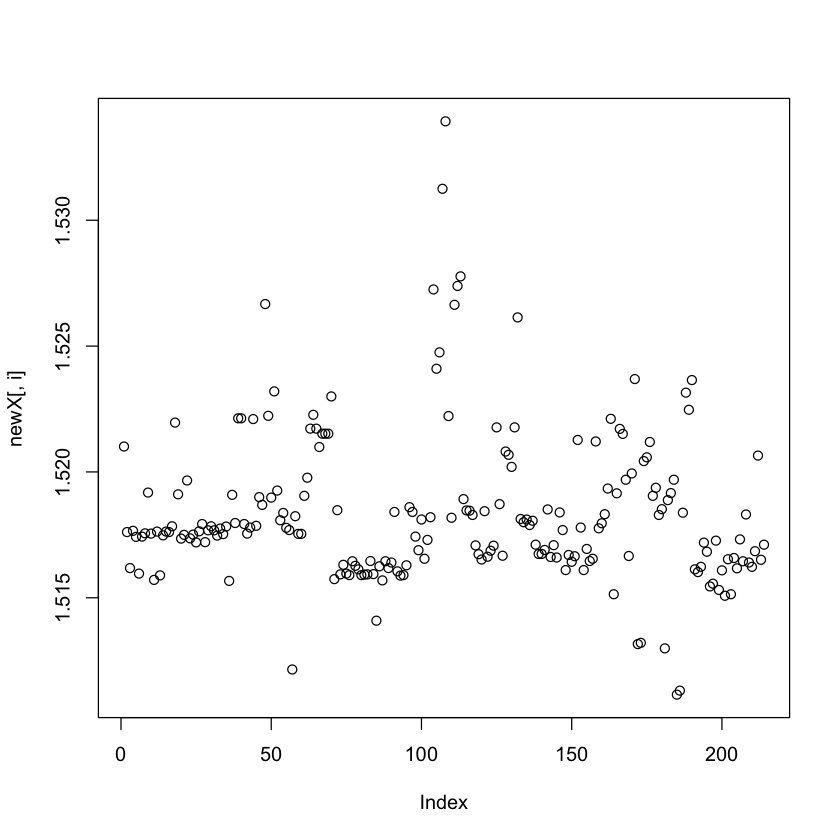

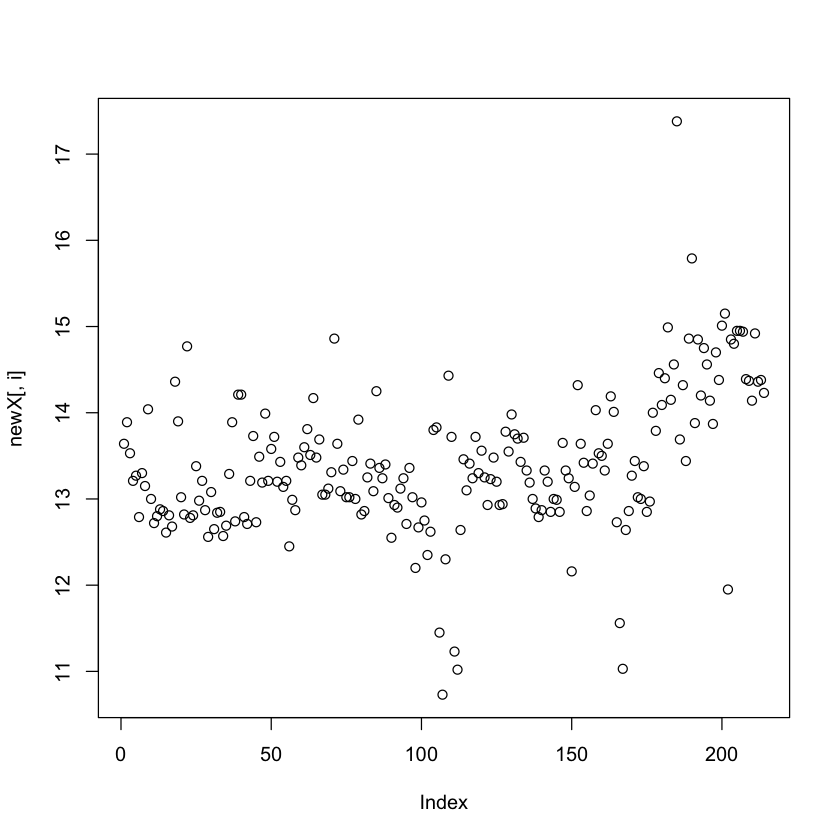

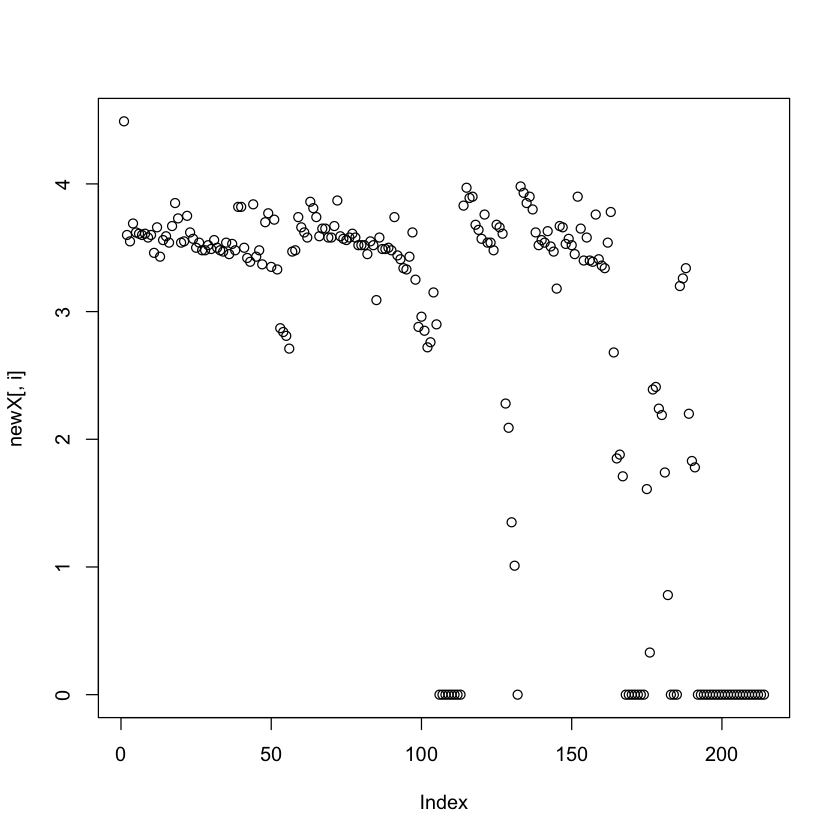

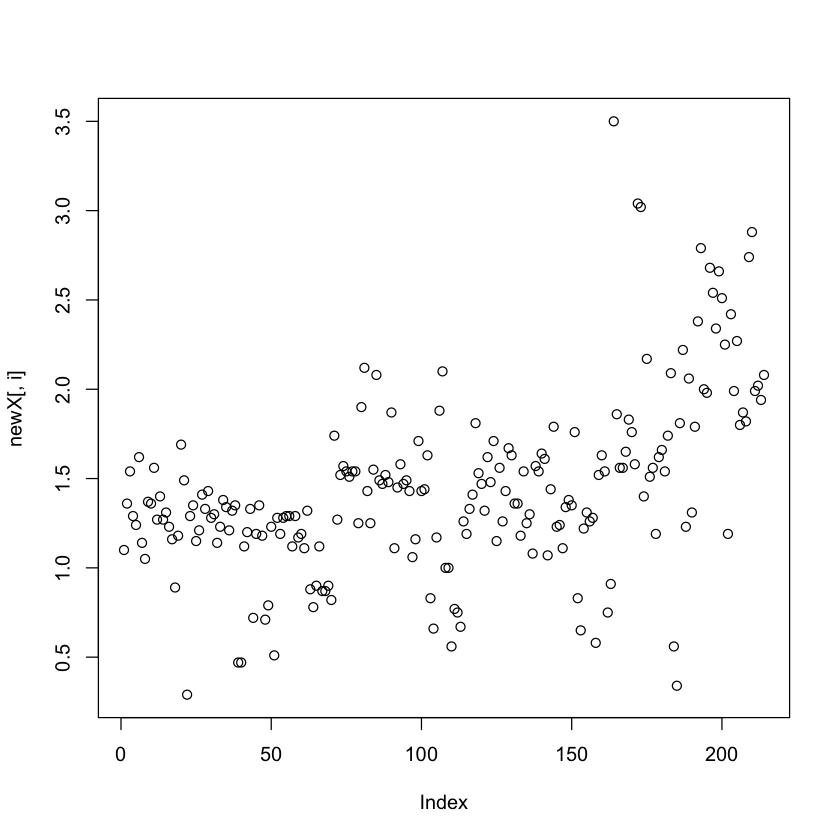

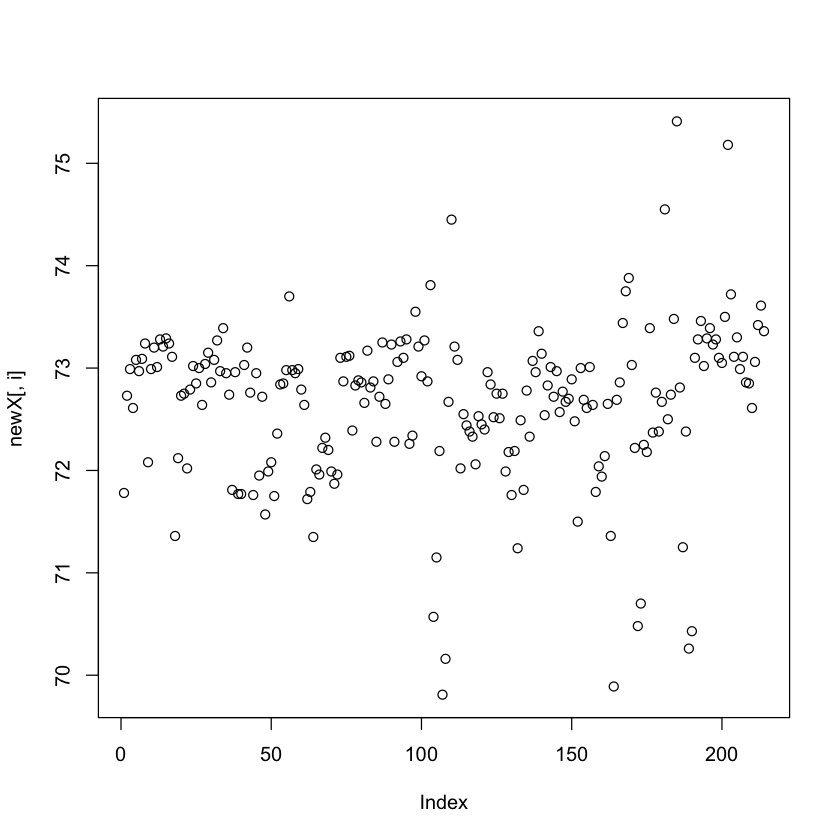

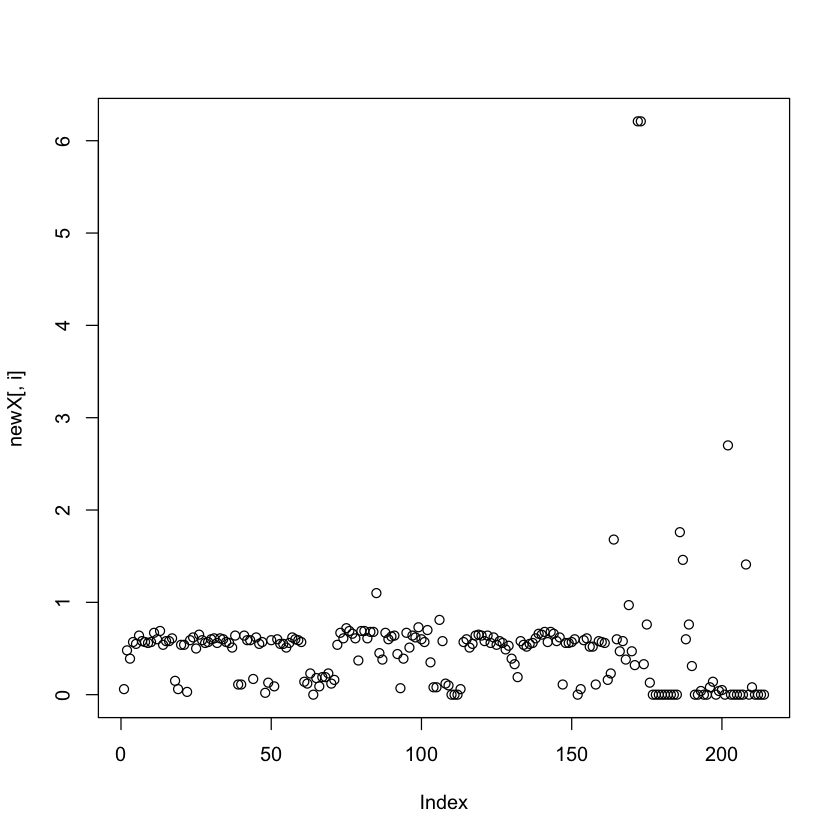

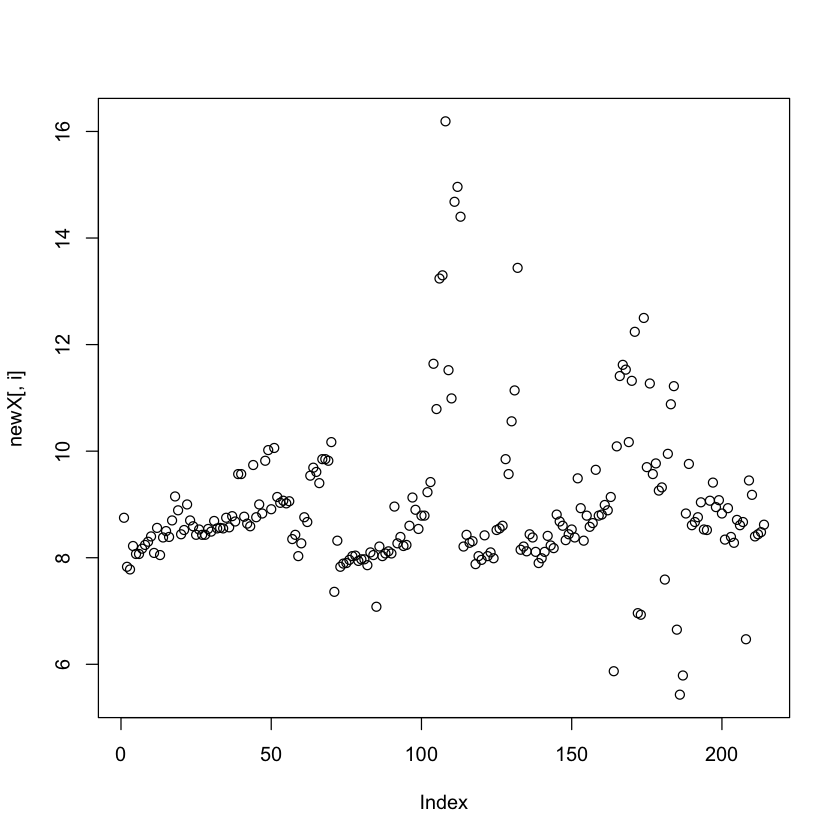

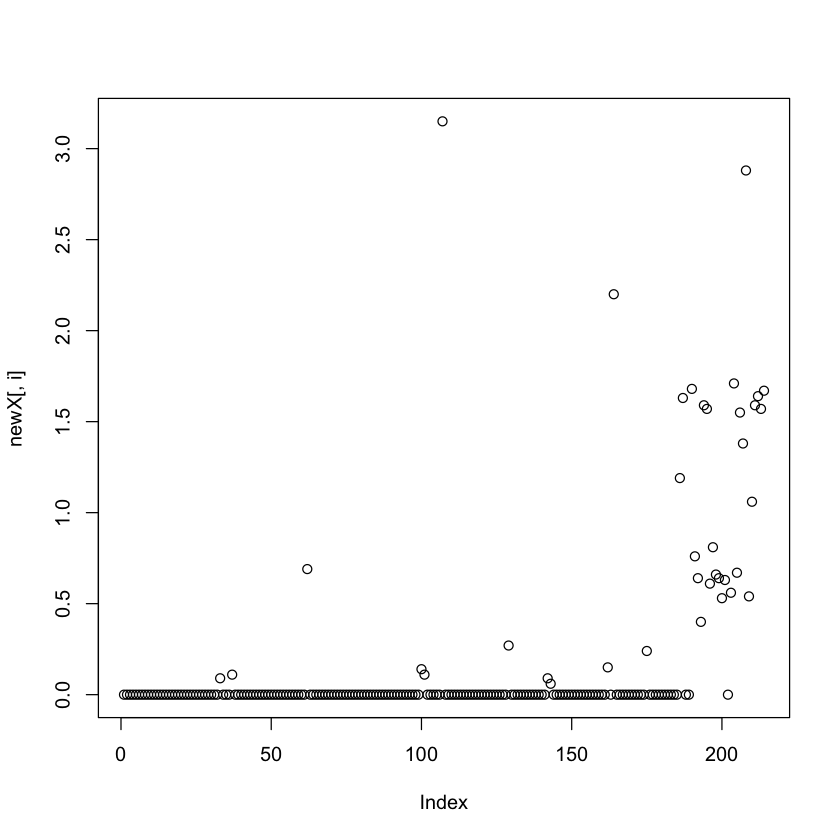

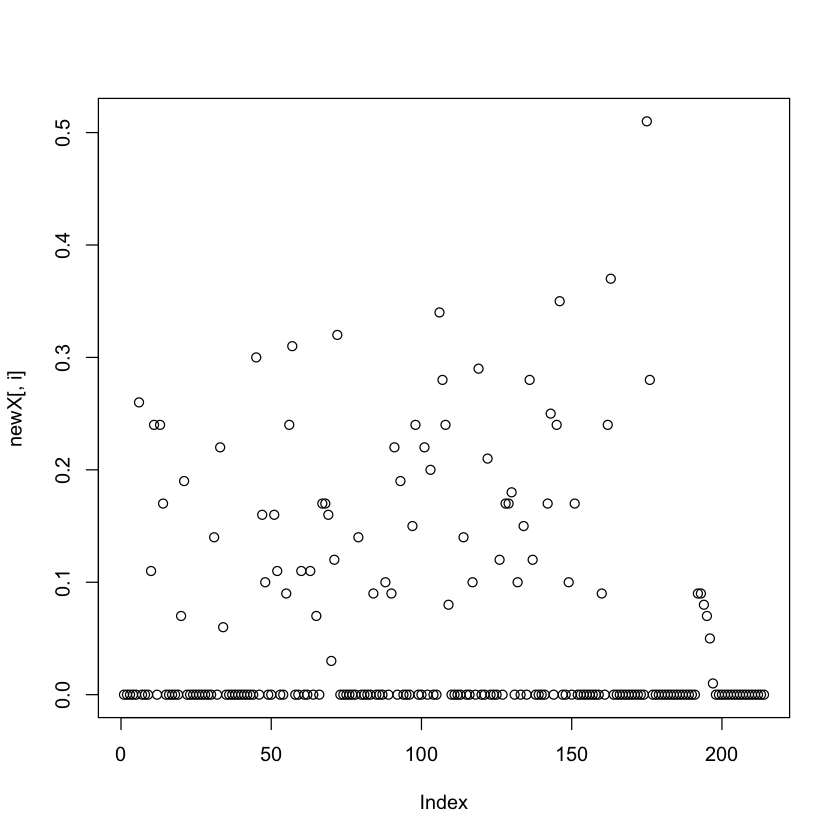

NULL

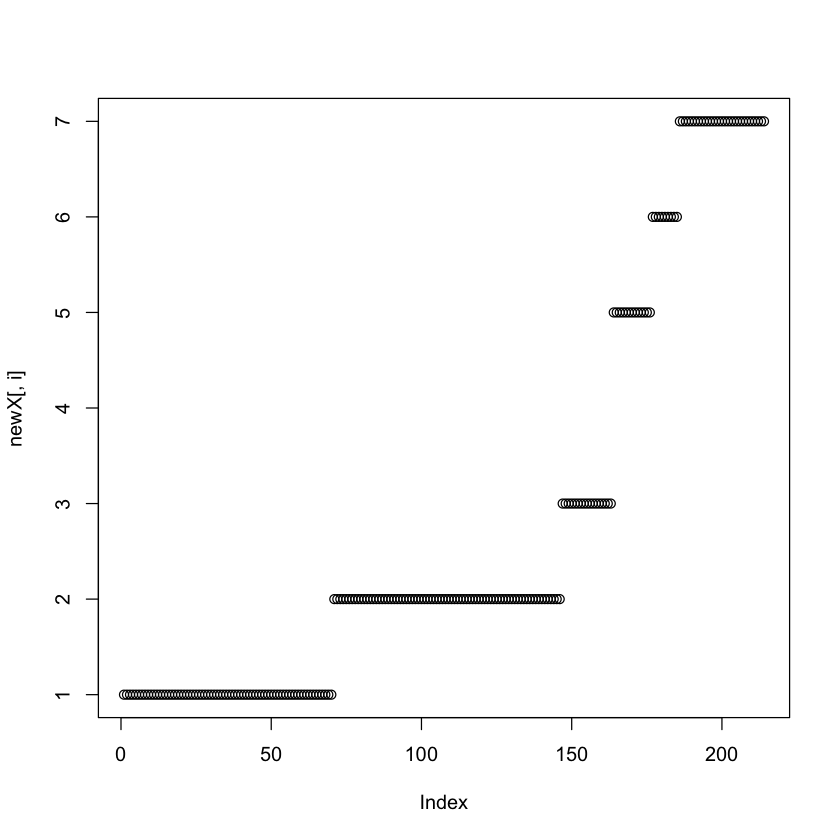

In [23]:
apply( Glass, 2, plot )

### Check skewness of Glass

In [22]:
apply( Glass[,1:9], 2, skewness )

RI         Na         Mg         Al         Si          K         Ca 
 1.6140150  0.4509917 -1.1444648  0.9009179 -0.7253173  6.5056358  2.0326774 
        Ba         Fe 
 3.3924309  1.7420068

#### c) Yes. Skew in K, Ca, Ba, and Fe. Could benefit from Box-Cox transformation. Scale and center would be usefull if the chosen model if impacted. 